In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('DFI -Ticketing.xlsx', sheet_name=None)

df = pd.DataFrame(df['Export - Tickets'])
df.head()


ID           Structure  ...     Category Sub-Category
0  55019  NUTRITION ET SANTE  ...  Supervision          NaN
1  55020  POCLAIN HYDRAULICS  ...          NaN          NaN
2  55021             RATPDEV  ...          NaN          NaN
3  55023                D-FI  ...          NaN          NaN
4  55024  POCLAIN HYDRAULICS  ...          NaN          NaN

[5 rows x 29 columns]

In [3]:
df = df.dropna(subset=['Wait Time'])


In [4]:
for  i,j in enumerate(df['Wait Time']):
  split_time = j.split(" ")
  hours = float(''.join(i for i in split_time[0] if i.isdigit()))
  minutes = float(float(''.join(i for i in split_time[1] if i.isdigit()))/60)
  #total_hours = float(str(hours)+str(minutes))
  total_hours = hours+minutes
  df['Wait Time'].iloc[i]= total_hours
  #print(total_hours)
  #print(df['Wait Time'].iloc[i])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
df_type = df.groupby('Type') 
df_type.first() 

ID           Structure  ...           Category Sub-Category
Type                                    ...                                
Changements  67269      REMY COINTREAU  ...           Stockage      Windows
Demandes     55051       INTRINSEC-MPB  ...  Tâche applicative    Epuration
Incidents    55019  NUTRITION ET SANTE  ...        Supervision      NETWORK

[3 rows x 28 columns]

In [6]:
for i in df_type:
  print(i[0])

Changements
Demandes
Incidents


In [7]:
types = [i[0] for i in df_type]
date_type_mean = [df_type.get_group(i[0])['Wait Time'].mean() for i in df_type]

date_type_mean

[181.78042071197416, 71.5025730994144, 57.88478100996941]

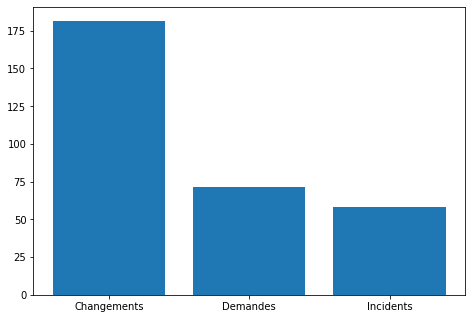

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(types,date_type_mean)
plt.show()